<h1 align='center'> <b><i> ACM-AI-Task 2 </i></b> </h1>
<h3 align='center'> Ouldouz Neysari </h3>
<h3 align='center'> Hesam Asadollahzadeh </h3>

## Q1: Import & describe the data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import csv
import statistics

In [2]:
data=pd.read_csv('AdmissionPredict.csv')
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,378.000000,380.000000,400.000000,400.000000,400.000000,380.000000,400.000000,384.000000
mean,200.500000,316.759259,107.386842,3.087500,3.400000,3.452500,8.604737,0.547500,0.724375
std,115.614301,11.415599,6.048645,1.143728,1.006869,0.898478,0.599167,0.498362,0.142964
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.250000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.640000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.080000,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          378 non-null    float64
 2   TOEFL Score        380 non-null    float64
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               380 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    384 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 28.2 KB


## Q2: Finding NaN values in each column

In [4]:
columns = data.columns
for column in columns:
    print("Number of NaN data in column\t", column, "= ", data[column].isna().sum())

Number of NaN data in column	 Serial No. =  0
Number of NaN data in column	 GRE Score =  22
Number of NaN data in column	 TOEFL Score =  20
Number of NaN data in column	 University Rating =  0
Number of NaN data in column	 SOP =  0
Number of NaN data in column	 LOR  =  0
Number of NaN data in column	 CGPA =  20
Number of NaN data in column	 Research =  0
Number of NaN data in column	 Chance of Admit =  16


## Q3: Using two methods to fill missing values

In [5]:
data = data[data['Chance of Admit'].notna()]

In [6]:
columns=data.columns
data_mean=pd.DataFrame()
for column in columns:
    data_mean[column]=data[column].fillna(data[column].mean())

In [7]:
data_median=pd.DataFrame()
for column in columns:
    data_median[column]=data[column].fillna(data[column].median())

* In the case of fields like salary, the data may be skewed. In such cases, it may not be a good idea to use mean imputation for replacing the missing values. When the data is skewed, it is good to consider using median value for replacing the missing values. 
* In the case of fields like testscores and GPA, it may be a good idea to use mean value for replacing missing values.

## Q4: Plotting data

In [8]:
# axs[0,0].scatter(data['Serial No.'],data['Chance of Admit'])
# axs[0,1].scatter(data['GRE Score'],data['Chance of Admit'])
# axs[0,2].scatter(data['TOEFL Score'],data['Chance of Admit'])
# axs[0,3].scatter(data['University Rating'],data['Chance of Admit'])
# axs[1,0].scatter(data['SOP'],data['Chance of Admit'])
# axs[1,1].scatter(data['LOR '],data['Chance of Admit'])
# axs[1,2].scatter(data['CGPA'],data['Chance of Admit'])
# axs[1,3].scatter(data['Research'],data['Chance of Admit'])

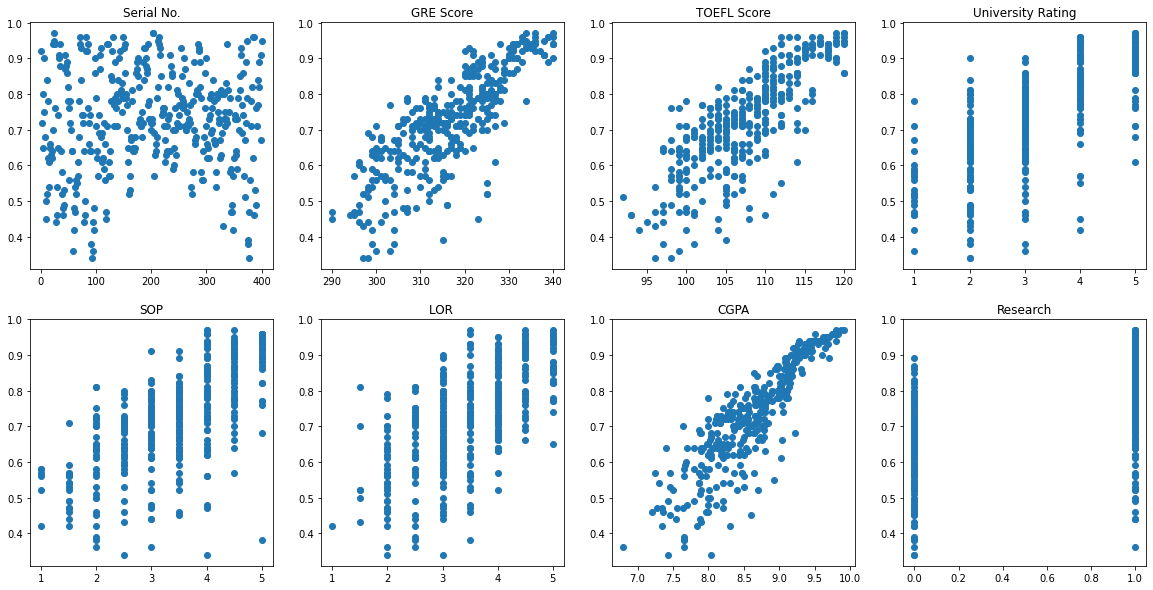

<Figure size 432x288 with 0 Axes>

In [9]:
fig,axs=plt.subplots(2,4, figsize=(20,10))
plt.figure()
c = 0
for i in range(2):
    for j in range(4):
        axs[i,j].scatter(data[columns[c]], data['Chance of Admit'])
        axs[i,j].set_title(columns[c])
        c += 1
plt.show()

## Q5: Choosing the best feature

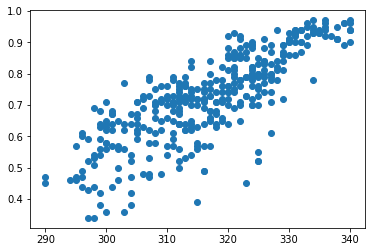

In [10]:
plt.scatter(data['GRE Score'],data['Chance of Admit'])

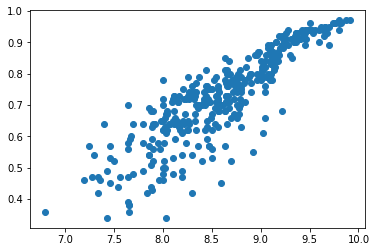

In [11]:
plt.scatter(data['CGPA'],data['Chance of Admit'])

## Q6: Regression

In [12]:
def create_df1(data):
    finaldf = pd.DataFrame()
    finaldf.insert(0, 'CGPA', data['CGPA'], True)
    finaldf.insert(0, 'Chance of Admit', data['Chance of Admit'], True)
    slice_index = int(0.8 * len(finaldf))
    traindf = finaldf[0:slice_index]
    testdf = finaldf[slice_index:]
    return traindf, testdf

In [13]:
def norm_equation1(finaldf):
    X0 = [1] * len(finaldf)
    X1 = list(finaldf['CGPA'])
    X = np.array([X0, X1])
    X = X.T
    theta = np.linalg.inv(X.T @ X)
    theta = theta @ X.T
    theta = theta @ np.array(finaldf['Chance of Admit'])
    return X, theta

In [14]:
def linear_model(theta, x):
    return theta[0] + theta[1] * x

In [15]:
traindf, testdf = create_df1(data_mean)
X, theta = norm_equation1(traindf)
model = linear_model(theta, traindf['CGPA'])
print("theta =", theta)

theta = [-1.08732357  0.21004009]


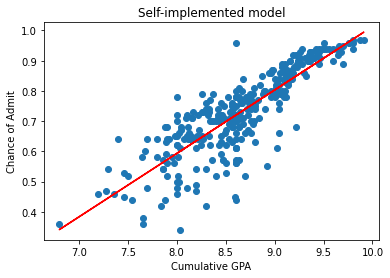

In [16]:
plt.scatter(traindf['CGPA'], traindf['Chance of Admit'])
plt.plot(traindf['CGPA'], model, c='r')
plt.xlabel('Cumulative GPA')
plt.ylabel('Chance of Admit')
plt.title('Self-implemented model')
plt.show()

In [17]:
pred = linear_model(theta, testdf['CGPA'])
preddf = pd.DataFrame()
preddf['pred'] = pred
preddf['Chance'] = testdf['Chance of Admit']
preddf

,pred,Chance
318,0.761029,0.79
319,0.737925,0.80
320,0.698017,0.75
321,0.685415,0.73
322,0.649708,0.72
...,...,...
394,0.851346,0.89
395,0.811439,0.82
397,0.897555,0.91
398,0.756828,0.67


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [19]:
print("MSE of self-implemented model is: %.6f" % mean_squared_error(preddf['Chance'], preddf['pred']))

MSE of self-implemented model is: 0.004898


Text(0.5, 1.0, 'Scikit-learn model')

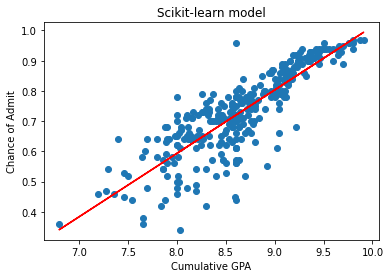

In [21]:
reg = LinearRegression().fit(X, traindf['Chance of Admit'])
pred = reg.predict(X)
plt.scatter(traindf['CGPA'], traindf['Chance of Admit'])
plt.plot(traindf['CGPA'], pred, c='r')
plt.xlabel('Cumulative GPA')
plt.ylabel('Chance of Admit')
plt.title('Scikit-learn model')

In [22]:
X, theta = norm_equation1(testdf)
pred = reg.predict(X)
print("Score of our single feature based model is: %.3f" % reg.score(X, testdf['Chance of Admit']))
print("MSE of scikit-learn model is: %.6f" % mean_squared_error(testdf['Chance of Admit'], pred))

Score of our single feature based model is: 0.785
MSE of scikit-learn model is: 0.004898
